# Lesson 4: Coding with o1

In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

# Import OpenAI key
from helper import get_openai_api_key
openai_api_key = get_openai_api_key()

In [3]:
from IPython.display import display, Image, Markdown
from openai import OpenAI

client = OpenAI(api_key=openai_api_key)
GPT_MODEL = 'gpt-4o-mini'
O1_MODEL = 'o1-mini'

## Create

In [4]:
def get_chat_completion(model, prompt):
    """
    Calls the OpenAI API to get a chat completion.

    :param model: The model to use for the completion.
    :param prompt: The prompt to send to the model.
    :return: The completion response from the model.
    """
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content


In [5]:
react_demo_prompt = """Create an elegant, delightful React component for an Interview Feedback Form where:

1. The interviewer rates candidates across multiple dimensions using rubrics
2. Each rating must include specific evidence/examples
3. The final recommendation should auto-calculate based on a weighted scoring system
4. The UI should guide interviewers to give specific, behavioral feedback

The goal is to enforce structured, objective feedback gathering. A smart model should:
- Create a thoughtful rubric structure
- Add helpful prompts/placeholders
- Build in intelligent validation

Make sure to
 - Call the element FeedbackForm
 - Start the code with "use client"

Respond with the code only! Nothing else!"""

In [6]:
gpt_code = get_chat_completion(GPT_MODEL, react_demo_prompt)

In [7]:
print(gpt_code)

```javascript
"use client";

import React, { useState } from 'react';

const rubric = {
  communication: { weight: 0.3, description: "Rate candidate's verbal and non-verbal communication skills" },
  problemSolving: { weight: 0.4, description: "Evaluate the candidate's analytical and critical thinking" },
  collaboration: { weight: 0.2, description: "Assess teamwork and interpersonal skills" },
  professionalism: { weight: 0.1, description: "Judge the candidate's professional demeanor and ethics" },
};

const FeedbackForm = () => {
  const [ratings, setRatings] = useState({
    communication: { score: '', evidence: '' },
    problemSolving: { score: '', evidence: '' },
    collaboration: { score: '', evidence: '' },
    professionalism: { score: '', evidence: '' },
  });
  
  const [finalRecommendation, setFinalRecommendation] = useState('');

  const handleChange = (dimension, field, value) => {
    setRatings(prev => ({
      ...prev,
      [dimension]: { ...prev[dimension], [field]:

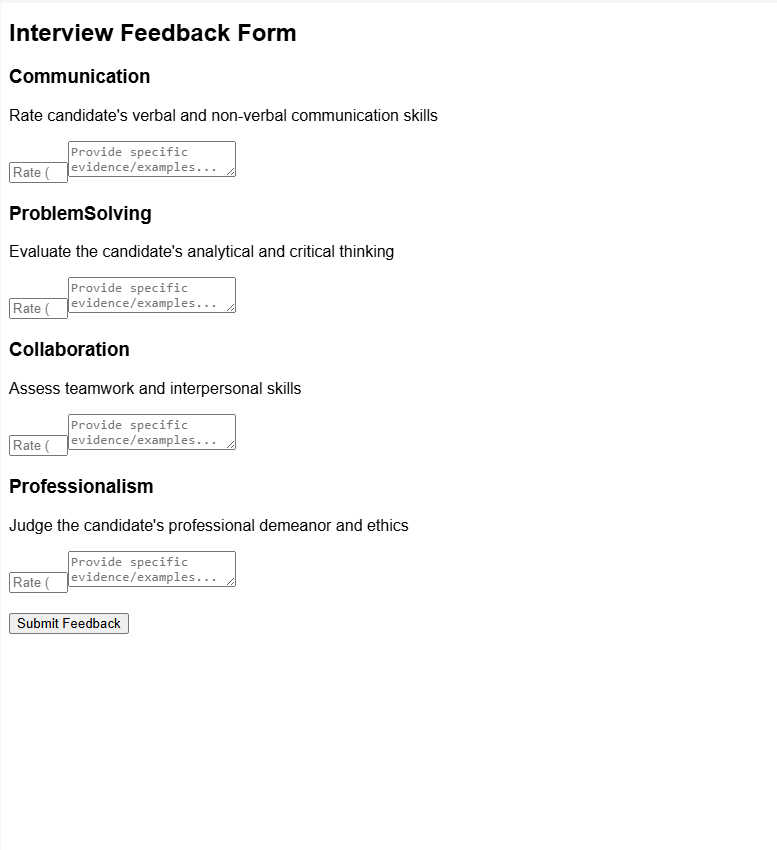

In [16]:
display(Image('gpt4_app_image.png'))

In [9]:
o1_code = get_chat_completion(O1_MODEL, react_demo_prompt)

In [10]:
print(o1_code)

```javascript
"use client";

import React, { useState, useEffect } from 'react';

const rubrics = [
  { id: 'communication', name: 'Communication Skills', weight: 0.3 },
  { id: 'technical', name: 'Technical Expertise', weight: 0.4 },
  { id: 'problemSolving', name: 'Problem-Solving Ability', weight: 0.3 },
];

const FeedbackForm = () => {
  const [ratings, setRatings] = useState({
    communication: '',
    technical: '',
    problemSolving: '',
  });

  const [evidences, setEvidences] = useState({
    communication: '',
    technical: '',
    problemSolving: '',
  });

  const [errors, setErrors] = useState({});
  const [finalScore, setFinalScore] = useState(0);
  const [recommendation, setRecommendation] = useState('');

  useEffect(() => {
    calculateFinalScore();
  }, [ratings]);

  const handleRatingChange = (dimension, value) => {
    setRatings({ ...ratings, [dimension]: value });
  };

  const handleEvidenceChange = (dimension, value) => {
    setEvidences({ ...evidences, [d

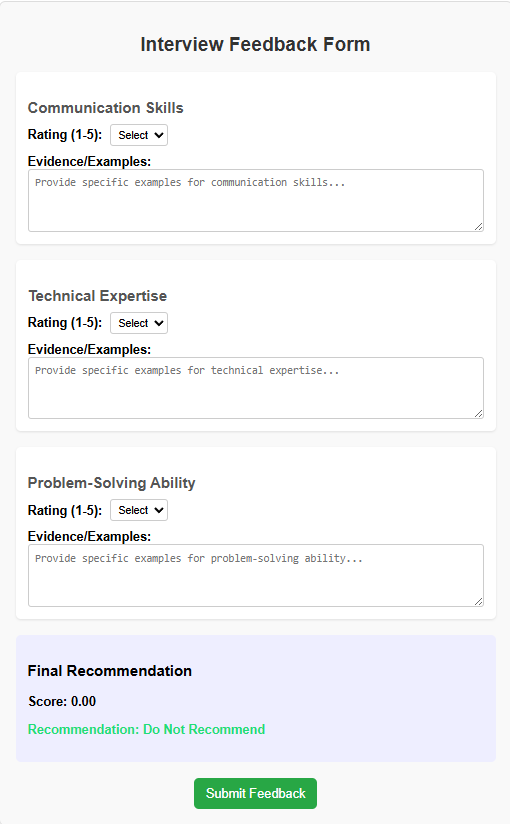

In [17]:
display(Image('o1_app_image.png'))

### Render the generated code yourself!
Try rendering this code yourself. &#x1F642;  
> Go to this [link](https://onecompiler.com/react), cut the code from the notebook and paste it into the editor.



## Edit

The included code has some clear issues, such as multiple nested loops and a lack of error handling, and also is not very readable. Let's feed the code to both models, and see how they clean it up.

In [12]:
# Pre-generated code snippet with issues that need to be resolved.
code_snippet = """
def process_orders(orders_list, settings={}, debug=False, notify_customer=True):
    results = []
    errors = []
    notifications = []
    # Process all orders
    for i in range(0, len(orders_list)):
        # Get order
        order = orders_list[i]
        try:
            # Validate order has required fields
            if 'id' in order and 'items' in order and 'customer' in order:
                # Check customer info
                if 'email' in order['customer'] and 'name' in order['customer']:
                    # Validate items
                    items_valid = True
                    total = 0
                    # Check each item
                    for item in order['items']:
                        if not ('product_id' in item and 'quantity' in item):
                            items_valid = False
                            errors.append(f"Invalid item in order {order['id']}")
                            if debug == True:
                                print(f"Debug: Invalid item found in order {order['id']}")
                        else:
                            # Calculate total
                            if 'price' in item:
                                total = total + (item['quantity'] * item['price'])
                            else:
                                items_valid = False
                                errors.append(f"Missing price in order {order['id']}")
                    # Process if items valid
                    if items_valid == True:
                        # Apply any discounts from settings
                        if settings != {} and 'discount' in settings:
                            total = total * (1 - settings['discount'])
                        # Create processed order
                        processed = {
                            'order_id': order['id'],
                            'customer_name': order['customer']['name'],
                            'customer_email': order['customer']['email'],
                            'total': total,
                            'items_count': len(order['items'])
                        }
                        results.append(processed)
                        # Send notification
                        if notify_customer == True:
                            try:
                                # Create notification
                                notification = {
                                    'to': order['customer']['email'],
                                    'subject': 'Order Processed',
                                    'total': total
                                }
                                notifications.append(notification)
                                if debug == True:
                                    print(f"Debug: Notification queued for order {order['id']}")
                            except Exception as e:
                                errors.append(f"Notification failed for order {order['id']}")
                else:
                    errors.append(f"Invalid customer data in order {order['id']}")
            else:
                errors.append(f"Missing required fields in order {order['id']}")
        except Exception as e:
            # Add general error
            errors.append(f"Error processing order {order['id']}: {str(e)}")
            if debug == True:
                print(f"Debug: Error processing order {order['id']}: {str(e)}")

    # Print debug summary
    if debug == True:
        print(f"Debug: Processed {len(results)} orders with {len(errors)} errors")
        print(f"Debug: Queued {len(notifications)} notifications")

    return {
        "processed_orders": results,
        "errors": errors,
        "notifications": notifications
    }
"""

In [13]:
prompt = f"""I have some code that I'd like you to clean up and improve. Return only the updated code that fixes the issues: {code_snippet}"""
gpt_code = get_chat_completion(GPT_MODEL, prompt)
print(gpt_code)

```python
def process_orders(orders_list, settings=None, debug=False, notify_customer=True):
    if settings is None:
        settings = {}
        
    results = []
    errors = []
    notifications = []

    for order in orders_list:
        try:
            # Validate order has required fields
            if all(key in order for key in ('id', 'items', 'customer')) and all(key in order['customer'] for key in ('email', 'name')):
                total = 0
                items_valid = True
                
                for item in order['items']:
                    if not all(key in item for key in ('product_id', 'quantity')):
                        items_valid = False
                        errors.append(f"Invalid item in order {order['id']}")
                        if debug:
                            print(f"Debug: Invalid item found in order {order['id']}")
                    elif 'price' in item:
                        total += item['quantity'] * item['price']
          

In [14]:
o1_code = get_chat_completion(O1_MODEL, prompt)
print(o1_code)

```python
def process_orders(orders_list, settings=None, debug=False, notify_customer=True):
    if settings is None:
        settings = {}

    results = []
    errors = []
    notifications = []
    # Process all orders
    for order in orders_list:
        try:
            # Validate order has required fields
            if not all(k in order for k in ('id', 'items', 'customer')):
                errors.append(f"Missing required fields in order {order.get('id', 'unknown')}")
                continue

            customer = order['customer']
            if not all(k in customer for k in ('email', 'name')):
                errors.append(f"Invalid customer data in order {order.get('id', 'unknown')}")
                continue

            items_valid = True
            total = 0
            for item in order['items']:
                if not all(k in item for k in ('product_id', 'quantity')):
                    items_valid = False
                    errors.append(f"Invalid item in orde

In [15]:
result = get_chat_completion(O1_MODEL,f"which code is better and why? Option 1: {gpt_code}... or Option 2: {o1_code}")
display(Markdown(result))

Both Option 1 and Option 2 implement the `process_orders` function effectively, but they differ in structure, readability, error handling, and maintainability. Here's a detailed comparison to determine which option is better and why:

### **1. Validation Approach**

- **Option 1:**
  - **Combined Validation:** Uses a single `if` statement to check both order-level and customer-level required fields using `all()`.
  - **Nesting:** This approach results in deeper nesting, which can make the code harder to read and maintain.
  - **Assumption:** After passing the combined validation, it assumes that `order['id']` is always present in the exception handling block. While this is generally safe due to prior validation, it can lead to potential issues if the structure changes in the future.

- **Option 2:**
  - **Sequential Validation:** Separates the validation into distinct `if` statements for order-level and customer-level fields. This makes the validation process clearer and more modular.
  - **Early Exits:** Uses `continue` to skip to the next order immediately after validation failure, reducing unnecessary nesting.
  - **Robust Error Handling:** Utilizes `order.get('id', 'unknown')` to safely handle cases where `'id'` might be missing, even though it’s validated earlier. This adds an extra layer of safety against unexpected changes in the data structure.

### **2. Error Handling and Messaging**

- **Option 1:**
  - **Error Messages:** Constructs error messages assuming that `order['id']` exists, which is generally safe but less flexible.
  - **Exception Block:** Directly accesses `order['id']`, which could raise a `KeyError` if the assumption fails.

- **Option 2:**
  - **Error Messages:** Uses `order.get('id', 'unknown')` to safely reference the order ID, ensuring that error messages remain informative even if the ID is missing.
  - **Exception Block:** More resilient by handling cases where `order['id']` might not be present, preventing potential `KeyError` exceptions.

### **3. Readability and Maintainability**

- **Option 1:**
  - **Nesting:** The combined `if` statement leads to deeper nesting, which can make the code harder to follow, especially as the function grows in complexity.
  - **Clarity:** While concise, the combined validation can obscure the individual validation steps, making it harder for future developers to understand and modify.

- **Option 2:**
  - **Linear Flow:** The sequential validation with early exits (`continue`) promotes a flatter and more readable structure.
  - **Modularity:** Separating validation steps makes the code easier to maintain and extend. Each validation block is clear and self-contained, facilitating easier debugging and updates.

### **4. Discount Application**

- **Option 1:**
  - **Direct Application:** Applies the discount directly using `total *= (1 - settings.get('discount', 0))`, which succinctly handles the discount logic.

- **Option 2:**
  - **Conditional Application:** Checks if a discount exists before applying it:
    ```python
    discount = settings.get('discount', 0)
    if discount:
        total *= (1 - discount)
    ```
  - **Behavior:** Functionally similar to Option 1 but introduces an extra conditional check. This eliminates the unnecessary multiplication by 1 when the discount is 0, which is a minor optimization.

### **5. Debugging and Logging**

- Both options include debug statements controlled by the `debug` flag, providing insights into the processing flow. However, Option 2 consistently uses `order.get('id', 'unknown')`, ensuring that debug messages remain informative even if the order ID is missing.

### **6. Overall Best Practices**

- **Option 2** adheres more closely to best practices:
  - **Single Responsibility Principle:** Each block of code handles a specific aspect of processing, enhancing clarity.
  - **Defensive Programming:** By using `get` methods, it defensively handles unexpected data structures, reducing the risk of runtime errors.
  - **Enhanced Readability:** The linear and modular structure makes the code easier to read, understand, and maintain.

### **Conclusion**

**Option 2** is superior due to its enhanced readability, robust error handling, and adherence to best coding practices. Its structured validation approach, combined with defensive programming techniques, makes it more maintainable and less prone to errors compared to Option 1.

### **Recommendation**

Adopt **Option 2** for better code quality and maintainability. Additionally, consider the following minor enhancements to further improve the function:

1. **Logging Framework:** Instead of using `print` statements for debugging, integrate Python's built-in `logging` module. This provides more flexibility and control over log levels and outputs.

2. **Type Hints:** Incorporate type hints to improve code clarity and assist with static type checking tools.

3. **Function Decomposition:** Break down the function into smaller helper functions (e.g., `validate_order`, `calculate_total`, `send_notification`) to further enhance readability and reusability.

### **Enhanced Option 2 Example with Improvements**

```python
import logging
from typing import List, Dict, Any, Optional

# Configure logging
logging.basicConfig(level=logging.DEBUG if debug else logging.INFO)
logger = logging.getLogger(__name__)

def process_orders(
    orders_list: List[Dict[str, Any]],
    settings: Optional[Dict[str, Any]] = None,
    debug: bool = False,
    notify_customer: bool = True
) -> Dict[str, List[Dict[str, Any]]]:
    if settings is None:
        settings = {}

    results = []
    errors = []
    notifications = []

    for order in orders_list:
        try:
            # Validate order-level fields
            if not all(k in order for k in ('id', 'items', 'customer')):
                errors.append(f"Missing required fields in order {order.get('id', 'unknown')}")
                continue

            customer = order['customer']
            
            # Validate customer-level fields
            if not all(k in customer for k in ('email', 'name')):
                errors.append(f"Invalid customer data in order {order.get('id', 'unknown')}")
                continue

            items_valid = True
            total = 0
            for item in order['items']:
                if not all(k in item for k in ('product_id', 'quantity')):
                    items_valid = False
                    errors.append(f"Invalid item in order {order.get('id', 'unknown')}")
                    if debug:
                        logger.debug(f"Invalid item found in order {order.get('id', 'unknown')}")
                elif 'price' not in item:
                    items_valid = False
                    errors.append(f"Missing price in order {order.get('id', 'unknown')}")
                    if debug:
                        logger.debug(f"Missing price in order {order.get('id', 'unknown')}")
                else:
                    total += item['quantity'] * item['price']

            if not items_valid:
                continue

            # Apply discount if any
            discount = settings.get('discount', 0)
            if discount:
                total *= (1 - discount)

            processed = {
                'order_id': order['id'],
                'customer_name': customer['name'],
                'customer_email': customer['email'],
                'total': total,
                'items_count': len(order['items'])
            }
            results.append(processed)

            # Prepare notification
            if notify_customer:
                notification = {
                    'to': customer['email'],
                    'subject': 'Order Processed',
                    'total': total
                }
                notifications.append(notification)
                if debug:
                    logger.debug(f"Notification queued for order {order.get('id', 'unknown')}")

        except Exception as e:
            order_id = order.get('id', 'unknown')
            errors.append(f"Error processing order {order_id}: {str(e)}")
            if debug:
                logger.debug(f"Error processing order {order_id}: {str(e)}")

    # Log summary
    if debug:
        logger.debug(f"Processed {len(results)} orders with {len(errors)} errors")
        logger.debug(f"Queued {len(notifications)} notifications")

    return {
        "processed_orders": results,
        "errors": errors,
        "notifications": notifications
    }
```

This enhanced version incorporates logging, type hints, and maintains the structured approach of Option 2, further improving the code's robustness and maintainability.